In [1]:
import numpy as np
import pandas as pd
from subprocess import check_output
import seaborn as sns
import warnings
from google.colab import files
uploaded = files.upload()
import io
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

Saving diabetes.csv to diabetes (1).csv


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD,Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers import Conv1D, Dropout ,LSTM ,BatchNormalization

seed = 42
np.random.seed(seed)

In [3]:
# load Pima dataset
pdata = pd.read_csv('diabetes.csv')
pdata.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
pdata.shape

(768, 9)

In [5]:
pdata.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
zero_fields = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

def check_zero_entries(data, fields):
    """ List number of 0-entries in each of the given fields"""
    for field in fields:
        print('field %s: num 0-entries: %d' % (field, len(data.loc[ data[field] == 0, field ])))

check_zero_entries(pdata, zero_fields)

field Glucose: num 0-entries: 5
field BloodPressure: num 0-entries: 35
field SkinThickness: num 0-entries: 227
field Insulin: num 0-entries: 374
field BMI: num 0-entries: 11


In [7]:
pdata.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
pdata.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
from sklearn.model_selection import train_test_split

features = list(pdata.columns.values)
features.remove('Outcome')
print(features)
X = pdata[features]
y = pdata['Outcome']


['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


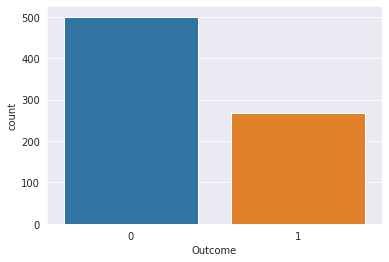

In [11]:
sns.countplot(x= 'Outcome', data = pdata)

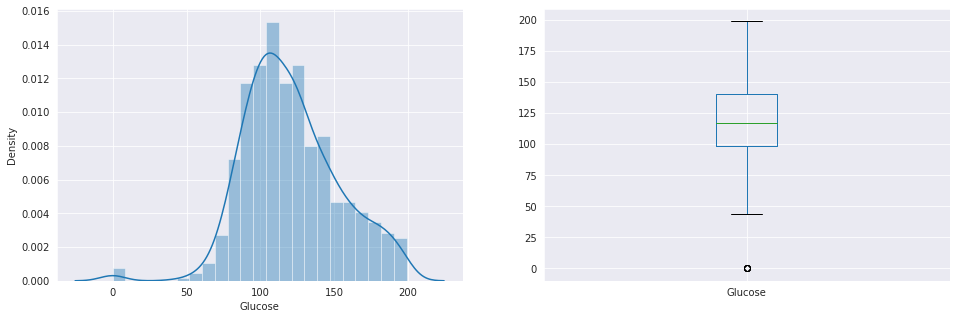

In [12]:
plt.figure(1)
plt.subplot(121), sns.distplot(pdata['Glucose'])
plt.subplot(122), pdata['Glucose'].plot.box(figsize=(16,5))
plt.show()

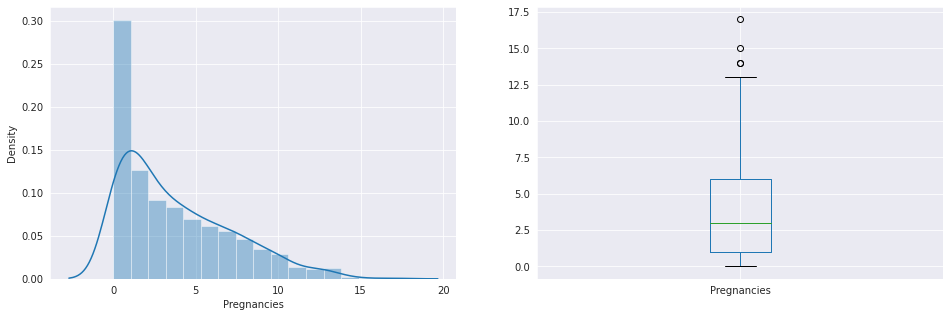

In [13]:
plt.figure(2)
plt.subplot(121), sns.distplot(pdata['Pregnancies'])
plt.subplot(122), pdata['Pregnancies'].plot.box(figsize=(16,5))
plt.show()

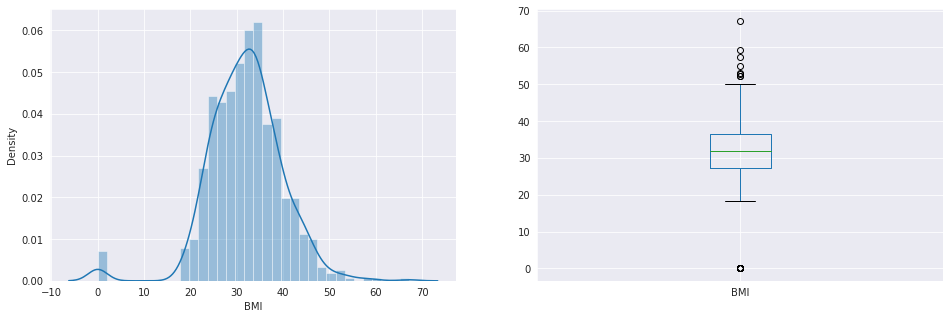

In [14]:
plt.subplot(121), sns.distplot(pdata['BMI'])
plt.subplot(122), pdata['BMI'].plot.box(figsize=(16,5))
plt.show()

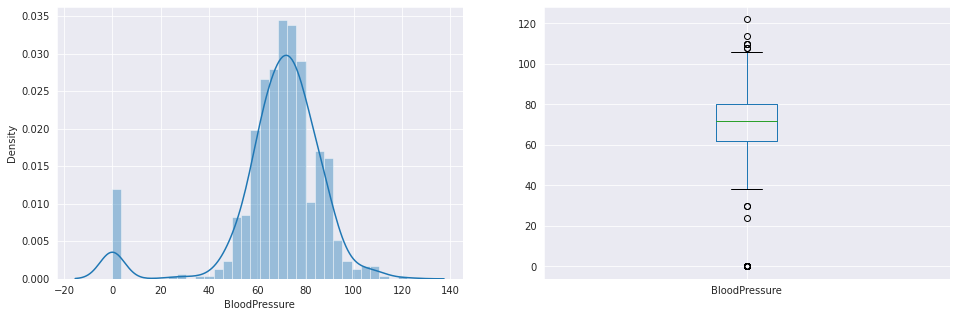

In [15]:
plt.subplot(121), sns.distplot(pdata['BloodPressure'])
plt.subplot(122), pdata['BloodPressure'].plot.box(figsize=(16,5))
plt.show()

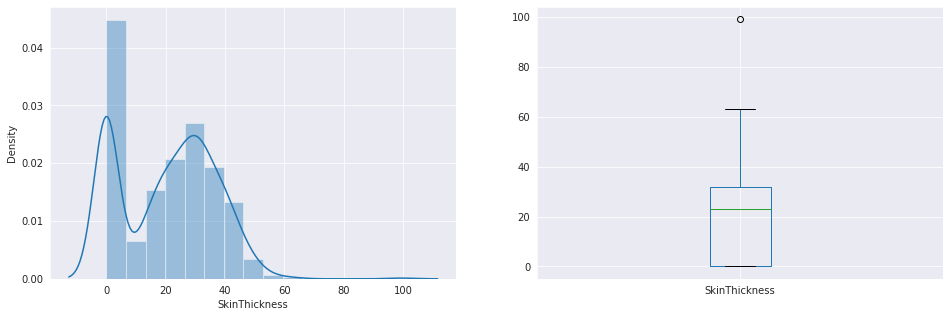

In [16]:
plt.subplot(121), sns.distplot(pdata['SkinThickness'])
plt.subplot(122), pdata['SkinThickness'].plot.box(figsize=(16,5))
plt.show()

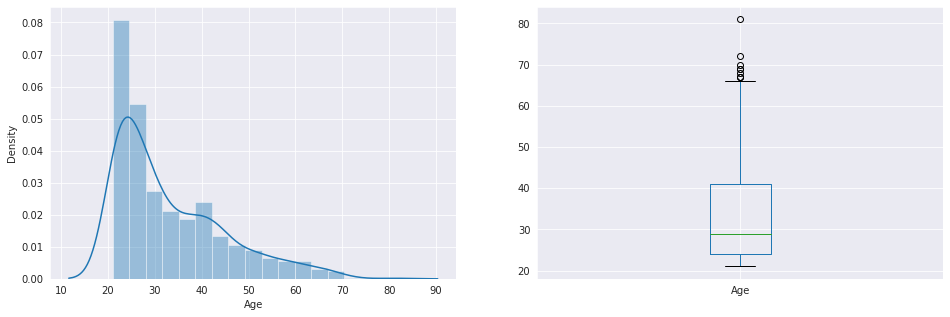

In [17]:
plt.subplot(121), sns.distplot(pdata['Age'])
plt.subplot(122), pdata['Age'].plot.box(figsize=(16,5))
plt.show()

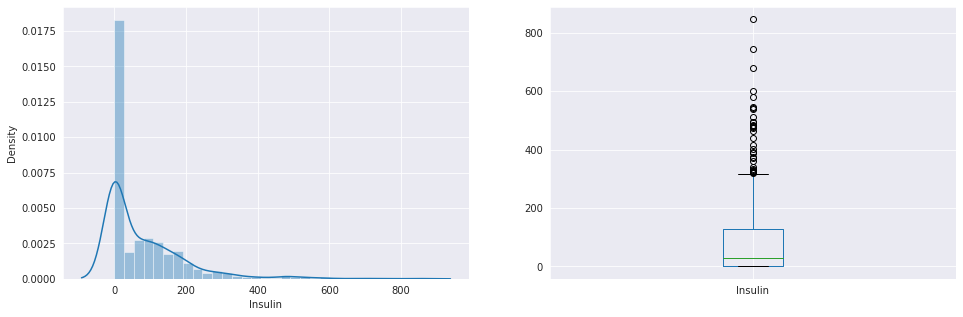

In [18]:
plt.subplot(121), sns.distplot(pdata['Insulin'])
plt.subplot(122), pdata['Insulin'].plot.box(figsize=(16,5))
plt.show()

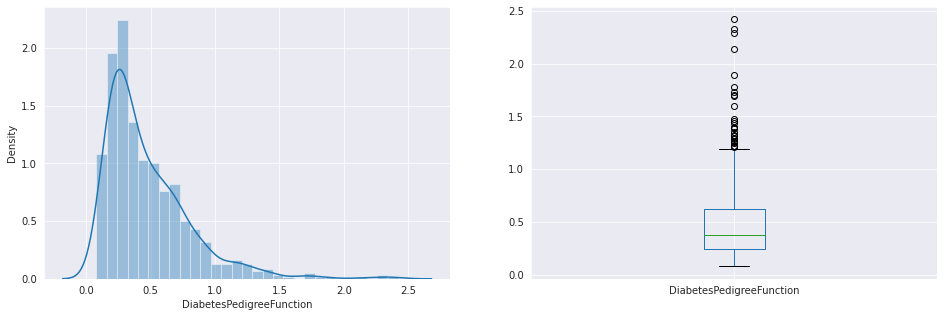

In [19]:
plt.subplot(121), sns.distplot(pdata['DiabetesPedigreeFunction'])
plt.subplot(122), pdata['DiabetesPedigreeFunction'].plot.box(figsize=(16,5))
plt.show()

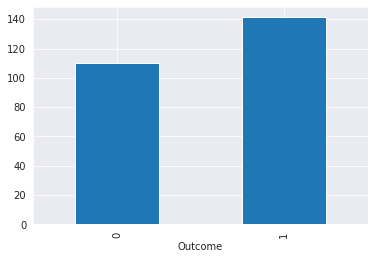

In [20]:
pdata.groupby('Outcome')['Glucose'].mean().plot.bar()

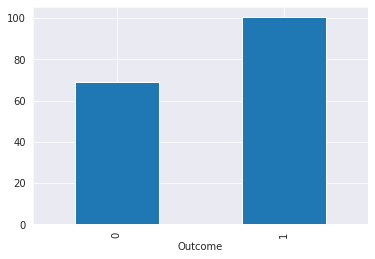

In [21]:
pdata.groupby('Outcome')['Insulin'].mean().plot.bar()

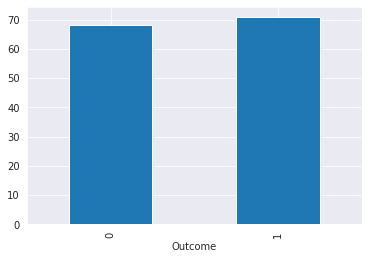

In [22]:
pdata.groupby('Outcome')['BloodPressure'].mean().plot.bar()

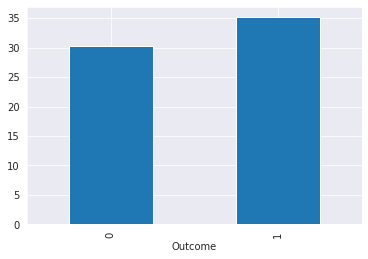

In [23]:
pdata.groupby('Outcome')['BMI'].mean().plot.bar()

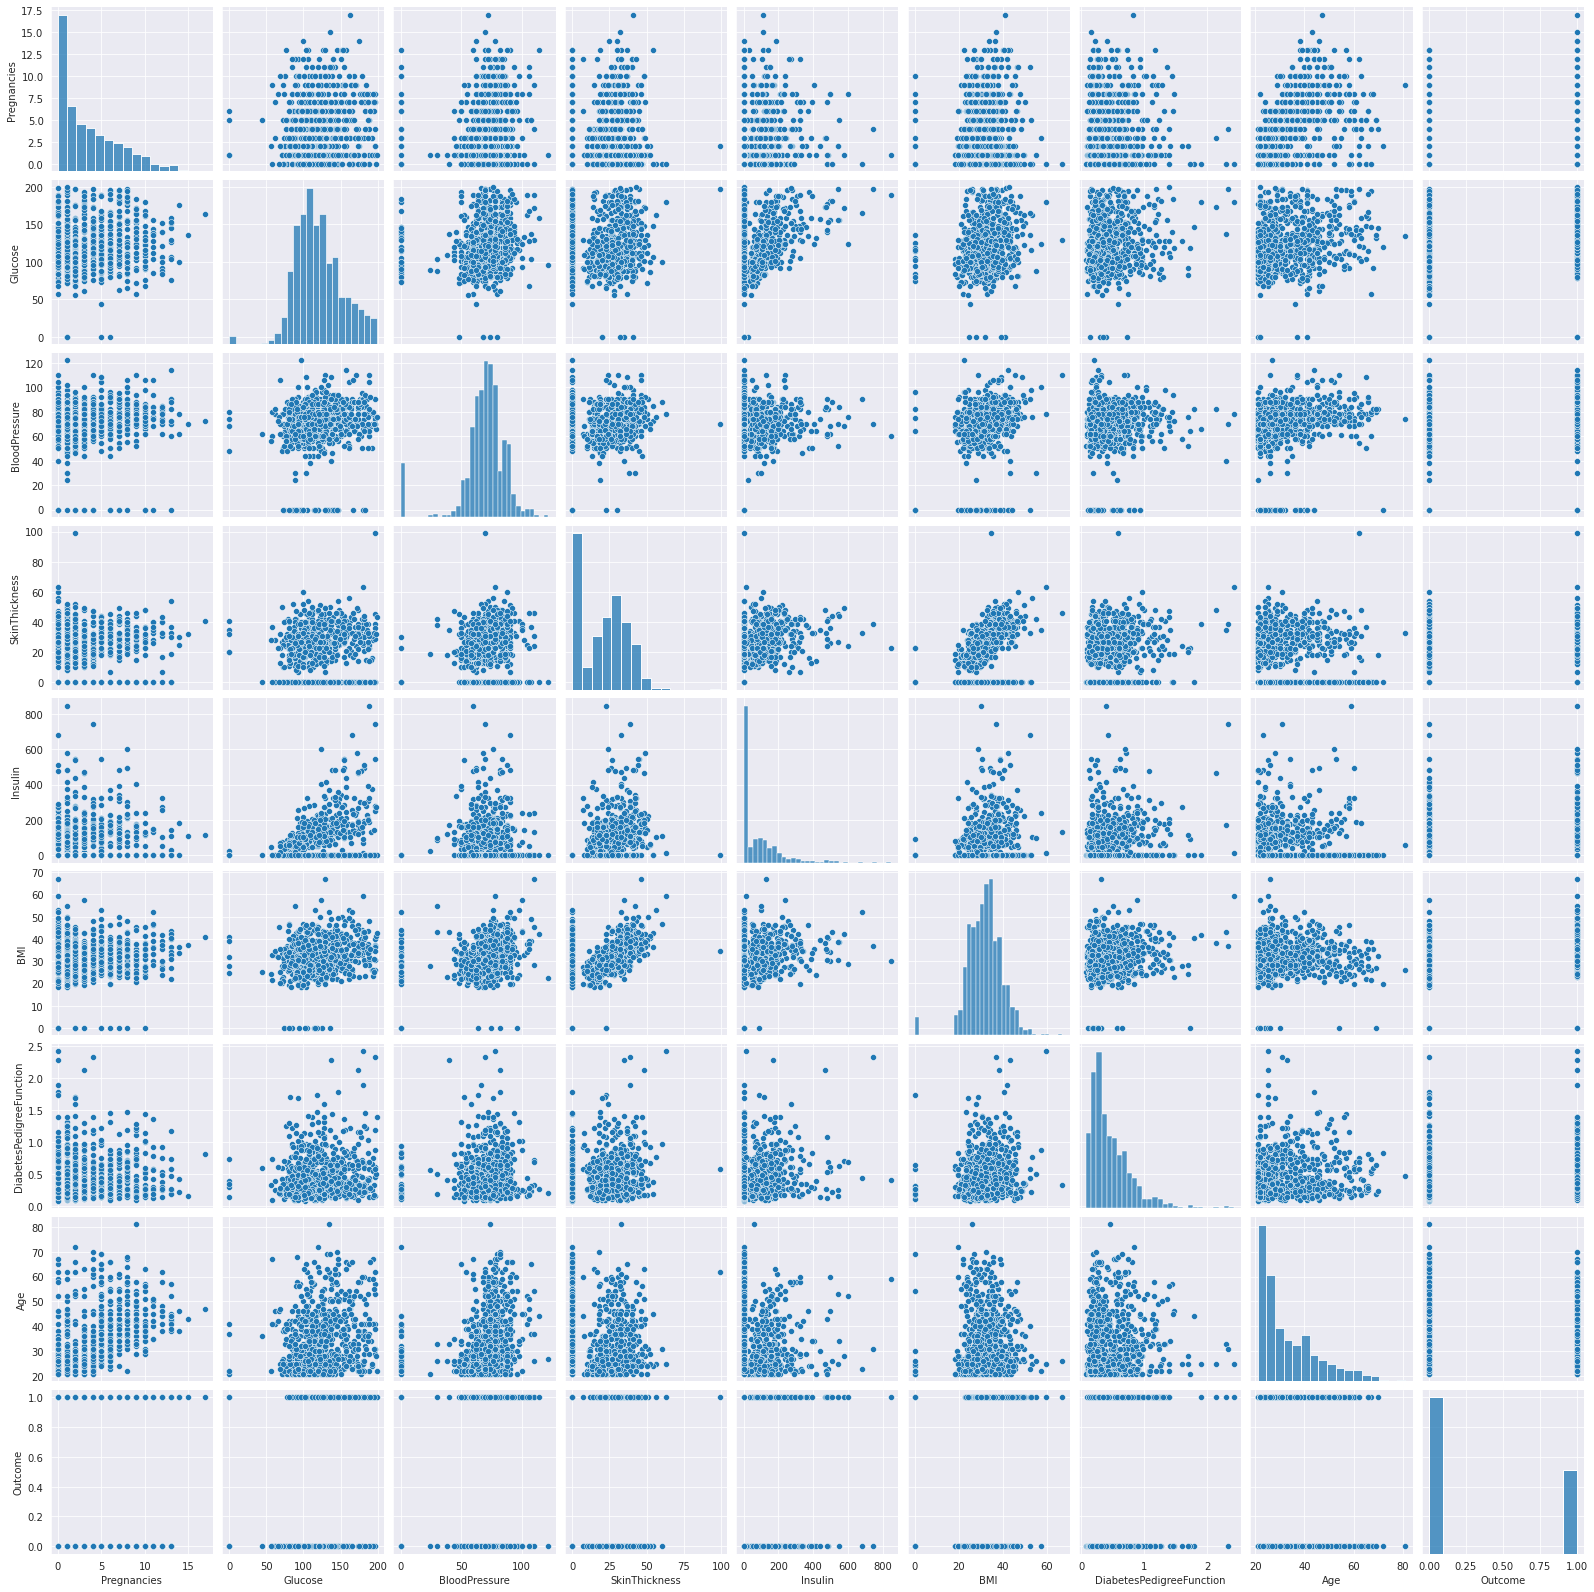

In [24]:
sns.pairplot(pdata)

In [25]:
pdata.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


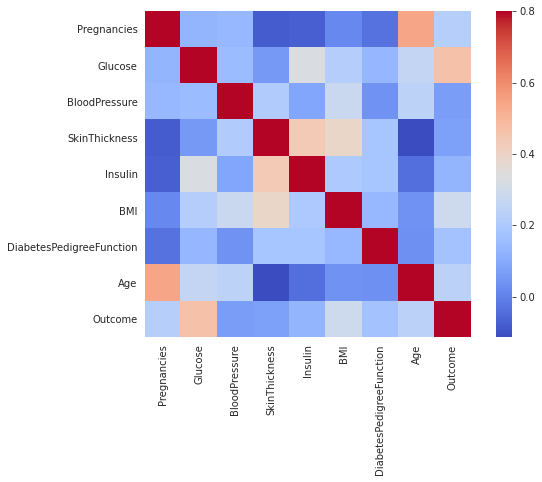

In [26]:
matrix = pdata.corr() 
ax = plt.subplots(figsize=(9, 6)), sns.heatmap(matrix, vmax=.8, square=True, cmap="coolwarm")

**READING THE DATA**

In [68]:
X_data = pdata.drop('Outcome',axis=1)
Y_data = pdata['Outcome']
from sklearn.feature_selection import SelectPercentile,GenericUnivariateSelect,SelectFromModel,SelectKBest
from sklearn.feature_selection import chi2 , f_classif 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split



**CLEANING THE DATA**

In [69]:
def impute_zero_field(data, field):
    nonzero_vals = data.loc[data[field] != 0, field]
    avg = np.sum(nonzero_vals) / len(nonzero_vals)
    k = len(data.loc[ data[field] == 0, field])   # num of 0-entries
    data.loc[ data[field] == 0, field ] = avg
    print('Field: %s; fixed %d entries with value: %.3f' % (field, k, avg))
    

In [70]:
for field in zero_fields:
    impute_zero_field(X_data, field)


Field: Glucose; fixed 5 entries with value: 121.687
Field: BloodPressure; fixed 35 entries with value: 72.405
Field: SkinThickness; fixed 227 entries with value: 29.153
Field: Insulin; fixed 374 entries with value: 155.548
Field: BMI; fixed 11 entries with value: 32.457


**FEATURE SELECTION**

In [71]:
FeatureSelection = SelectKBest(score_func= chi2 ,k=7)
F_data = FeatureSelection.fit_transform(X_data,Y_data)
print('Selected Features are : ' , FeatureSelection.get_support())


Selected Features are :  [ True  True  True  True  True  True False  True]


**SCALING THE DATA**

In [72]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 5))
N_data = scaler.fit_transform(F_data)


**SHAPING THE INPUT**

In [73]:
new_X_data = []
new_Y_data = []
for i in range(0 , len(N_data)):
  new_X_data.append(N_data[i:i+1])
new_X_data = np.array(new_X_data)
for i in range(0 , len(Y_data)):
  new_Y_data.append(Y_data[i:i+1])
new_Y_data = np.array(new_Y_data)
print(new_X_data.shape)
print(new_Y_data.shape)


(768, 1, 7)
(768, 1)


**SPLIT THE DATA**

In [74]:
X_train, X_test, y_train, y_test = train_test_split(new_X_data,new_Y_data,test_size=0.2,random_state=0)
print(X_train.shape)
print(y_test.shape)

(614, 1, 7)
(154, 1)


**DECLARING THE VARIABLES**

In [75]:
batch_size = 1
num_classes = 1
epochs=200

**BUILDING THE MODEL**

In [76]:

from keras.layers import Conv1D, Dropout ,LSTM ,BatchNormalization

model = Sequential()

model.add(Conv1D(8,kernel_size=1,activation='relu'))

model.add(BatchNormalization())

model.add(Flatten())

model.add(BatchNormalization())

model.add(Dropout(0.7))

model.add(Dense(4, activation='relu'))

model.add(BatchNormalization())

model.add(Dense(num_classes, activation='sigmoid'))

adam = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


**FITTING THE MODEL**

In [77]:
from keras.callbacks import EarlyStopping
checkpoint_filepath = '/content/drive/MyDrive/model.hdf'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='loss',
    mode='auto',
    save_best_only=True)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=150)
# Model weights are saved at the end of every epoch, if it's the best seen
# so fa
hsitory = model.fit(X_train , y_train , validation_data = (X_test  , y_test) , epochs=200, callbacks=[model_checkpoint_callback ,es])

Epoch 1/200
20/20 [==============================] - 1s 13ms/step - loss: 0.8647 - accuracy: 0.3117 - val_loss: 0.7261 - val_accuracy: 0.6948
Epoch 2/200
20/20 [==============================] - 0s 3ms/step - loss: 0.7911 - accuracy: 0.3947 - val_loss: 0.7139 - val_accuracy: 0.6169
Epoch 3/200
20/20 [==============================] - 0s 3ms/step - loss: 0.7719 - accuracy: 0.3510 - val_loss: 0.7097 - val_accuracy: 0.5065
Epoch 4/200
20/20 [==============================] - 0s 3ms/step - loss: 0.7589 - accuracy: 0.4038 - val_loss: 0.7025 - val_accuracy: 0.4610
Epoch 5/200
20/20 [==============================] - 0s 3ms/step - loss: 0.7524 - accuracy: 0.4539 - val_loss: 0.6895 - val_accuracy: 0.6299
Epoch 6/200
20/20 [==============================] - 0s 3ms/step - loss: 0.7339 - accuracy: 0.4992 - val_loss: 0.6766 - val_accuracy: 0.6688
Epoch 7/200
20/20 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.5291 - val_loss: 0.6644 - val_accuracy: 0.7338
Epoch 8/200


**THE ACCURACY**

In [78]:
score = model.evaluate(X_test, y_test,verbose=0)
print("Test score:", score[0])
print('Test accuracy:', score[1])

Test score: 0.4389941096305847
Test accuracy: 0.8116883039474487


**ACCURACY AND LOSS LABLES**

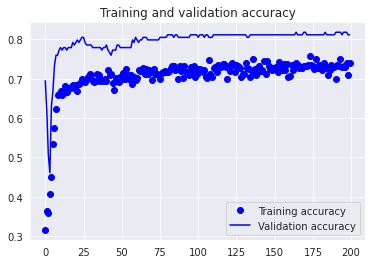

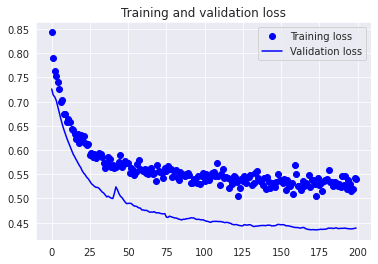

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline
history = hsitory
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**RECALL SCORE**

In [80]:
import sklearn
from sklearn.metrics import recall_score
sklearn.metrics.recall_score(np.round(model.predict(X_test)), y_test,  average='binary' )

0.7647058823529411

**CLASSIFICATION REPORT**

In [81]:
from sklearn.metrics import classification_report
print(classification_report(np.round(model.predict(X_test)), y_test))

              precision    recall  f1-score   support

         0.0       0.93      0.82      0.87       120
         1.0       0.55      0.76      0.64        34

    accuracy                           0.81       154
   macro avg       0.74      0.79      0.76       154
weighted avg       0.84      0.81      0.82       154



# RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=5000)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
predictions = rfc.predict(X_test)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.7012987012987013


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[37 13]
 [10 17]]
              precision    recall  f1-score   support

           0       0.79      0.74      0.76        50
           1       0.57      0.63      0.60        27

    accuracy                           0.70        77
   macro avg       0.68      0.68      0.68        77
weighted avg       0.71      0.70      0.70        77



# DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
predictions = dtree.predict(X_test)
from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.6753246753246753


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[35 15]
 [10 17]]
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        50
           1       0.53      0.63      0.58        27

    accuracy                           0.68        77
   macro avg       0.65      0.66      0.66        77
weighted avg       0.69      0.68      0.68        77



# XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(gamma=0)
xgb_model.fit(X_train, y_train)

[16:48:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [ ]:
xgb_pred = xgb_model.predict(X_test)
from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test, xgb_pred)))

Accuracy Score = 0.7012987012987013


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test,xgb_pred))

[[37 13]
 [10 17]]
              precision    recall  f1-score   support

           0       0.79      0.74      0.76        50
           1       0.57      0.63      0.60        27

    accuracy                           0.70        77
   macro avg       0.68      0.68      0.68        77
weighted avg       0.71      0.70      0.70        77



# Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svc_pred = svc_model.predict(X_test)
from sklearn import metrics
print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)))

Accuracy Score = 0.7272727272727273


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test,svc_pred))

[[41  9]
 [12 15]]
              precision    recall  f1-score   support

           0       0.77      0.82      0.80        50
           1       0.62      0.56      0.59        27

    accuracy                           0.73        77
   macro avg       0.70      0.69      0.69        77
weighted avg       0.72      0.73      0.72        77



In [ ]:
xgb_model.feature_importances_

array([0.09929741, 0.24625437, 0.08138702, 0.10337853, 0.12457809,
       0.1373462 , 0.08062467, 0.12713374], dtype=float32)

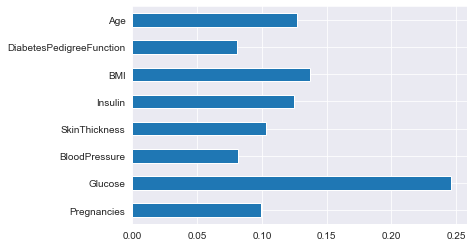

In [ ]:
#feature importances
(pd.Series(xgb_model.feature_importances_, index=X.columns)
   .plot(kind='barh'))  

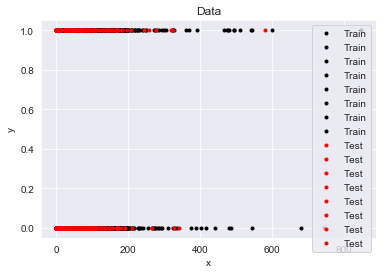

In [ ]:
plt.plot(X_train, y_train, 'k.', label = 'Train'); 
plt.plot(X_test, y_test, 'r.', label = 'Test')
plt.legend()
plt.xlabel('x'); plt.ylabel('y'); plt.title('Data');